In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

from datetime import datetime

import IPython
import IPython.display
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-29 18:37:07.490978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [13]:
df_climate = pd.read_csv(csv_path)

In [14]:
# Backup
df_climate_back = df_climate.copy()

In [15]:
# 아래 코드는 10분단위로 들어온 데이터를 50분 데이터만 추출해,
# 그 데이터를 해당 시간의 대표값으로 처리하는 방법
# df = df[5::6]

# 아래 방법은 해당 시간대의 평균값으로 대체하는 공식
df_climate['Date Time'] = \
    pd.to_datetime(df_climate['Date Time'], format='%d.%m.%Y %H:%M:%S')
df_climate.set_index('Date Time', inplace=True)
df_climate = df_climate.resample('H').mean()

In [16]:
df_climate.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,265.118000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000
2009-01-01 01:00:00,996.525000,-8.065000,265.361667,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667
2009-01-01 02:00:00,996.745000,-8.763333,264.645000,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 03:00:00,996.986667,-8.896667,264.491667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 04:00:00,997.158333,-9.348333,264.026667,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333


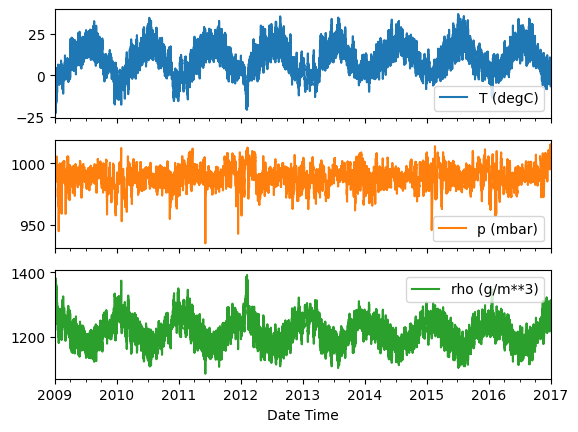

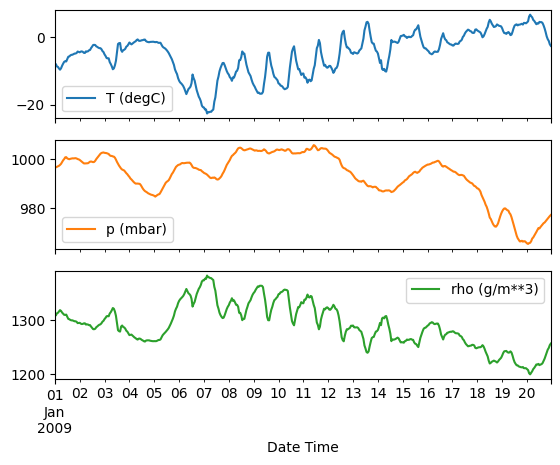

In [17]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df_climate[plot_cols]
plot_features.index = df_climate.index
_ = plot_features.plot(subplots=True)

plot_features = df_climate[plot_cols][:480]
plot_features.index = df_climate.index[:480]
_ = plot_features.plot(subplots=True)

In [18]:
df_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70041.0,989.214359,8.358615,934.905000,984.206667,989.570000,994.726667,1015.243333
T (degC),70041.0,9.442390,8.414647,-22.653333,3.358333,9.410000,15.461667,37.038333
Tpot (K),70041.0,283.484834,8.495644,250.970000,277.430000,283.455000,289.515000,310.976667
Tdew (degC),70041.0,4.953446,6.727769,-24.601667,0.233333,5.215000,10.068333,23.016667
rh (%),70041.0,76.028671,16.385638,13.683333,65.308333,79.266667,89.350000,100.000000
VPmax (mbar),70041.0,13.568619,7.725238,0.980000,7.776667,11.818333,17.598333,62.943333
VPact (mbar),70041.0,9.532337,4.180956,0.821667,6.213333,8.861667,12.351667,28.168333
VPdef (mbar),70041.0,4.036199,4.874833,0.000000,0.878333,2.195000,5.290000,45.195000
sh (g/kg),70041.0,6.021505,2.654106,0.516667,3.918333,5.595000,7.801667,18.025000
H2OC (mmol/mol),70041.0,9.638782,4.232169,0.828333,6.283333,8.963333,12.481667,28.661667


In [19]:
# 이 두 행은 조건에 의해 특정 컬럼값을 변경시키는 방법임(같은 기능)
df_climate['wv (m/s)'][df_climate['wv (m/s)'] < 0.0] = 0.0
# df_climate.loc[df_climate['wv (m/s)'] < 0.0, 'wv (m/s)'] = 0.0
df_climate['max. wv (m/s)'] = df_climate['max. wv (m/s)'].apply(lambda x: 0 if x < 0 else x)

In [20]:
df_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70041.0,989.214359,8.358615,934.905000,984.206667,989.570000,994.726667,1015.243333
T (degC),70041.0,9.442390,8.414647,-22.653333,3.358333,9.410000,15.461667,37.038333
Tpot (K),70041.0,283.484834,8.495644,250.970000,277.430000,283.455000,289.515000,310.976667
Tdew (degC),70041.0,4.953446,6.727769,-24.601667,0.233333,5.215000,10.068333,23.016667
rh (%),70041.0,76.028671,16.385638,13.683333,65.308333,79.266667,89.350000,100.000000
VPmax (mbar),70041.0,13.568619,7.725238,0.980000,7.776667,11.818333,17.598333,62.943333
VPact (mbar),70041.0,9.532337,4.180956,0.821667,6.213333,8.861667,12.351667,28.168333
VPdef (mbar),70041.0,4.036199,4.874833,0.000000,0.878333,2.195000,5.290000,45.195000
sh (g/kg),70041.0,6.021505,2.654106,0.516667,3.918333,5.595000,7.801667,18.025000
H2OC (mmol/mol),70041.0,9.638782,4.232169,0.828333,6.283333,8.963333,12.481667,28.661667


In [21]:
# 풍속과 풍향을 결합해 바람벡터 생성

wv = df_climate.pop('wv (m/s)')
max_wv = df_climate.pop('max. wv (m/s)')

wd_radian = df_climate.pop('wd (deg)') * np.pi / 180

# 바람백터 생성
df_climate['Vwv_X'] = wv * np.cos(wd_radian)
df_climate['Vwv_Y'] = wv * np.sin(wd_radian)
df_climate['Vmwv_X'] = max_wv * np.cos(wd_radian)
df_climate['Vmwv_Y'] = max_wv * np.sin(wd_radian)

In [22]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70129 entries, 2009-01-01 00:00:00 to 2017-01-01 00:00:00
Freq: H
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         70041 non-null  float64
 1   T (degC)         70041 non-null  float64
 2   Tpot (K)         70041 non-null  float64
 3   Tdew (degC)      70041 non-null  float64
 4   rh (%)           70041 non-null  float64
 5   VPmax (mbar)     70041 non-null  float64
 6   VPact (mbar)     70041 non-null  float64
 7   VPdef (mbar)     70041 non-null  float64
 8   sh (g/kg)        70041 non-null  float64
 9   H2OC (mmol/mol)  70041 non-null  float64
 10  rho (g/m**3)     70041 non-null  float64
 11  Vwv_X            70041 non-null  float64
 12  Vwv_Y            70041 non-null  float64
 13  Vmwv_X           70041 non-null  float64
 14  Vmwv_Y           70041 non-null  float64
dtypes: float64(15)
memory usage: 8.6 MB


In [25]:
_day = 24 * 60 * 60
_year = (365.2425) * _day
_timestamp_s = df_climate.index.map(pd.Timestamp.timestamp)

In [26]:
df_climate['day_sin'] = np.sin(_timestamp_s * (2 * np.pi / _day))
df_climate['day_cos'] = np.cos(_timestamp_s * (2 * np.pi / _day))
df_climate['year_sin'] = np.sin(_timestamp_s * (2 * np.pi / _year))
df_climate['year_cos'] = np.cos(_timestamp_s * (2 * np.pi / _year))

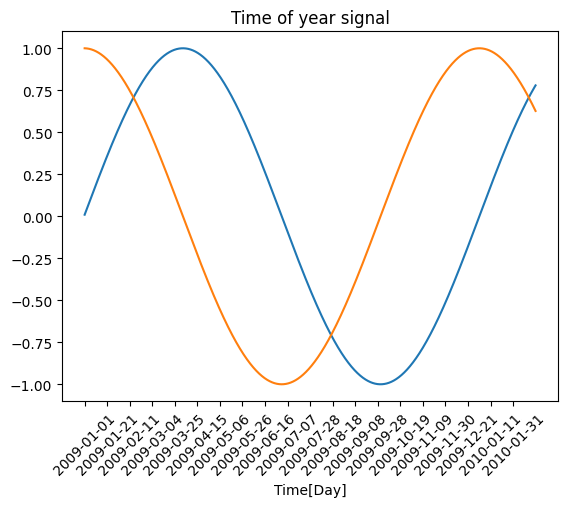

In [36]:
plt.plot(df_climate['year_sin'][:10000])
plt.plot(df_climate['year_cos'][:10000])
plt.xticks(df_climate.index[:10000:500], rotation=45)
plt.xlabel('Time[Day]')
plt.title('Time of year signal')
plt.show()

In [37]:
column_indices = {name: i for i, name in enumerate(df_climate.columns)}

In [38]:
column_indices

{'p (mbar)': 0,
 'T (degC)': 1,
 'Tpot (K)': 2,
 'Tdew (degC)': 3,
 'rh (%)': 4,
 'VPmax (mbar)': 5,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'sh (g/kg)': 8,
 'H2OC (mmol/mol)': 9,
 'rho (g/m**3)': 10,
 'Vwv_X': 11,
 'Vwv_Y': 12,
 'Vmwv_X': 13,
 'Vmwv_Y': 14,
 'day_sin': 15,
 'day_cos': 16,
 'year_sin': 17,
 'year_cos': 18}

In [40]:
total_size = df_climate.shape[0]
num_features = df_climate.shape[1]

In [41]:
df_train = df_climate[0:int(total_size * 0.7)]
df_valid = df_climate[int(total_size * 0.7): int(total_size * 0.9)]
df_test = df_climate[int(total_size * 0.9):]

In [42]:
data_mean = df_train.mean()
data_std = df_train.std()

df_train = (df_train - data_mean) / data_std
df_valid = (df_valid - data_mean) / data_std
df_test = (df_test - data_mean) / data_std

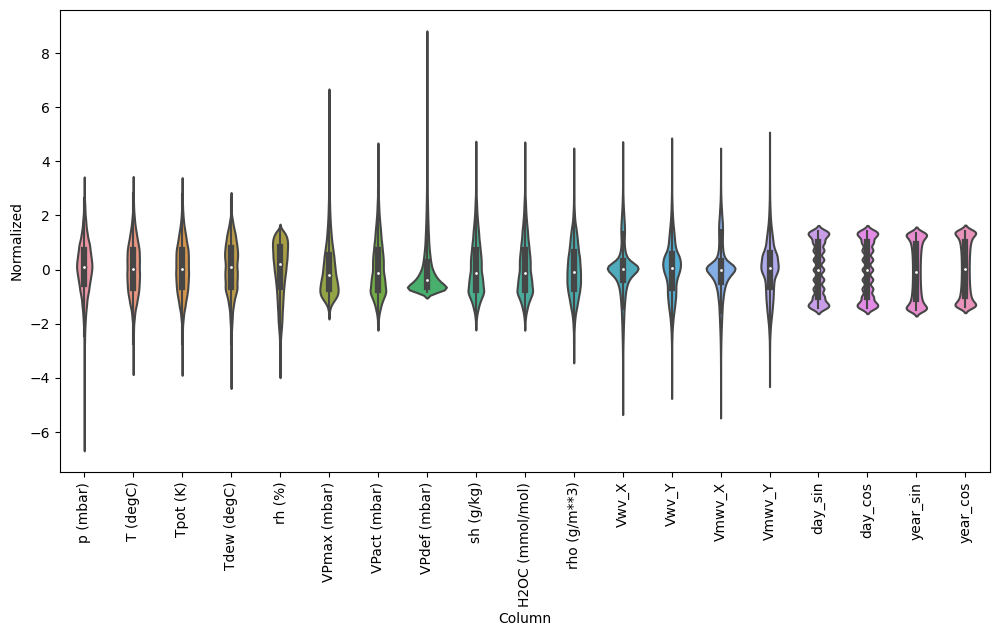

In [43]:
df_climate_std = (df_climate - data_mean) / data_std
df_climate_std = df_climate_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_climate_std)
_ = ax.set_xticklabels(df_climate.keys(), rotation=90)
plt.show()

In [106]:
class WindowGenerator():
    
    def __init__(
        self,
        input_width,    # 입력데이터 창의 크기
        shift,          # 레이블까지의 거리(레이블 창 크기포함)
        label_width,    # 레이블 창의 크기(보통 1)
        df_train = df_train,
        df_valid = df_valid,
        df_test = df_test,
        label_cols=None
    ):
        self.df_train = df_train
        self.df_valid = df_valid
        self.df_test = df_test
        
        self.label_cols = label_cols
        if label_cols is not None:
            self.label_cols_indices = {name: i for i, name in enumerate(label_cols)}
        self.col_indices = {name: i for i, name in enumerate(df_train.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_cols}'])
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.label_slice, :]
        if self.label_cols is not None:
            labels = tf.stack(
                [labels[:, :, self.col_indices[name]] for name in self.label_cols],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        print(f'inputs shape: {inputs.shape}')
        print(f'labels shape: {labels.shape}')
        
        self.inputs = inputs
        self.labels = labels
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        plt.figure(figsize=(12, 8))
        plot_col_index = self.col_indices[plot_col]
        max_n = min(max_subplots, len(self.inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(
                self.input_indices, self.inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10
            )
            if self.label_cols:
                label_col_index = self.label_cols_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index
            if label_col_index is None:
                continue
            
            plt.scatter(
                self.label_indices, self.labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64
            )
            if model is not None:
                predictions = model(self.inputs)
                plt.scatter(
                    self.label_indices, 
                    predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', 
                    label='Predictions', c='#ff7f0e', s=64
                )
            
            if n == 0:
                plt.legend()
            
        plt.xlabel('Time [h]')
        plt.show()
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        print(len(ds))
        ds = ds.map(self.split_window)
        
    @property
    def train(self):
        print(self.df_train.shape)
        return self.make_dataset(self.df_train)
    
    @property
    def valid(self):
        return self.make_dataset(self.df_valid)
    
    @property
    def test(self):
        return self.make_dataset(self.df_test)
    
    # @property
    # def example(self):
    #     result = getattr(self, '_example', None)
    #     if result is None:
    #         result = next(iter(self.train))
    #         self._example = result
    #     return result

In [107]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, 
                     label_cols=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [108]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_cols=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [109]:
example_window = tf.stack([
    np.array(df_train[:w2.total_window_size]),
    np.array(df_train[100:100+w2.total_window_size]),
    np.array(df_train[200:200+w2.total_window_size])
])

example_inputs, example_labels = w2.split_window(example_window)

inputs shape: (3, 6, 19)
labels shape: (3, 1, 1)


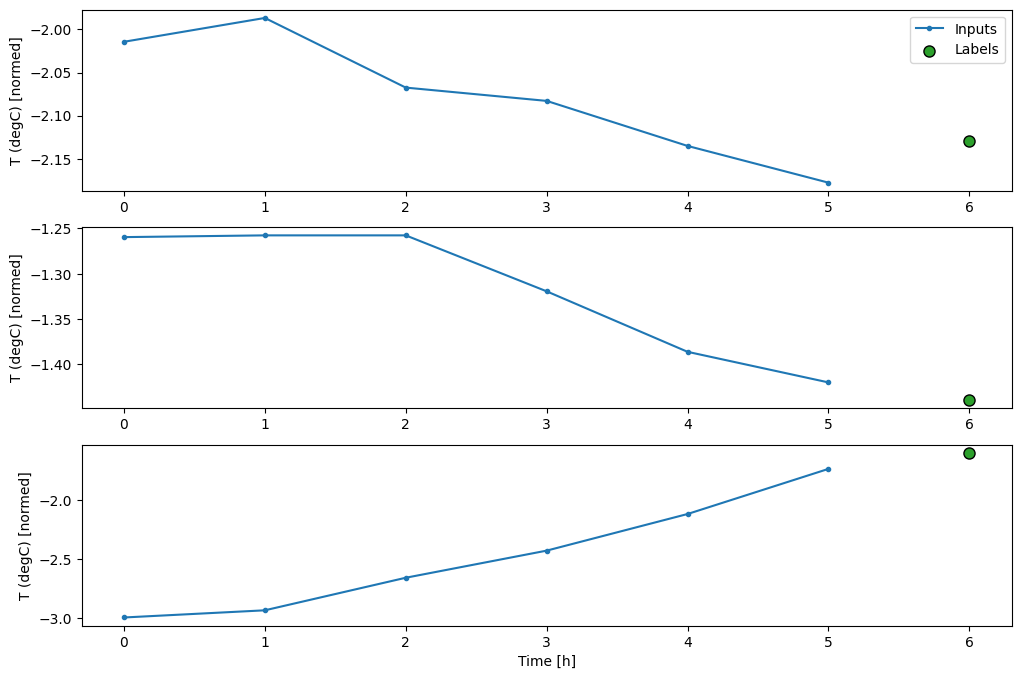

In [110]:
w2.plot()

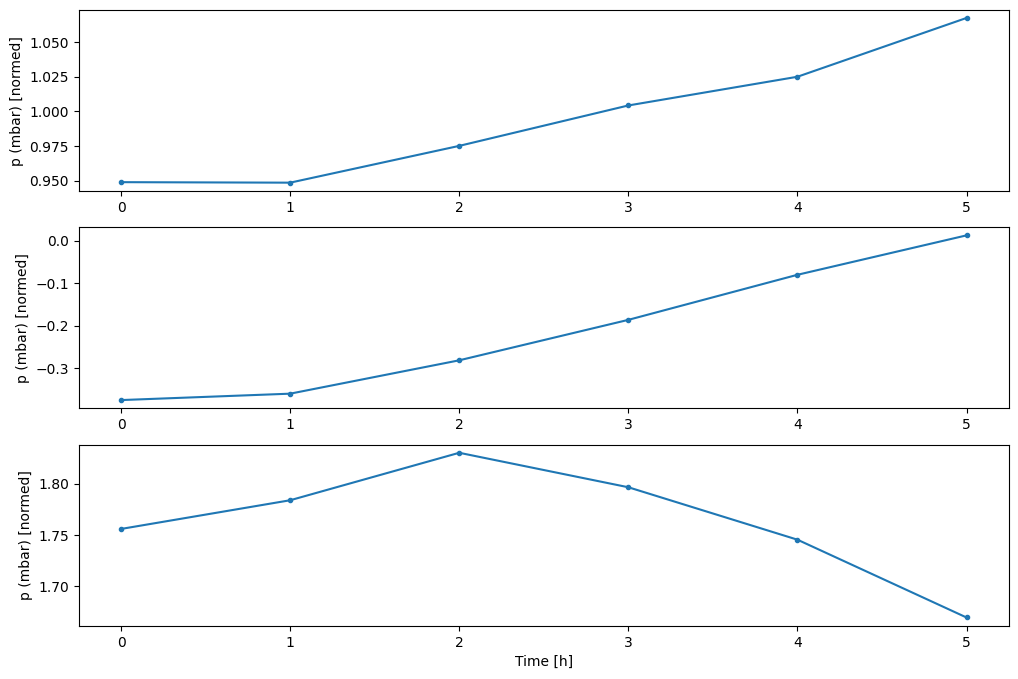

In [111]:
w2.plot(plot_col='p (mbar)')

In [112]:
w2.train.element_spec

(49090, 19)
1534
inputs shape: (None, 6, 19)
labels shape: (None, 1, 1)


AttributeError: 'NoneType' object has no attribute 'element_spec'

In [113]:
aa = w2.make_dataset(df_train)

1534
inputs shape: (None, 6, 19)
labels shape: (None, 1, 1)
